In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn import metrics
import plotly.io as pio
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EV_ChargingStations.csv to EV_ChargingStations (1).csv
Saving EV_India.csv to EV_India (1).csv
Saving EV_VehiclesData.csv to EV_VehiclesData (1).csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['EV_ChargingStations (1).csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['EV_India (1).csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['EV_VehiclesData (1).csv']))

In [ ]:
df1.head()

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [ ]:
df2.head(15)

,CompanyName,Brand,EV ModelName,Vehicle Type& Segment,VehicleCMVRCategory,IncentiveAmountInINR,Range (Km),Max. SpeedKm/Hr),Acceleration(m/s2,WarrantyInYears),ElectricEnergyconsumptionKWh per100KM,BatteryTechnology,BatteryCapacity(kWh),BatteryDensityWh/Kg),Battery cycleNo. ofCycles)
0,AltigreenPropulsionLabs Pvt Ltd,Altigreen,NEEV,ThreeWheeler ( e-3W,L5N,75000,117.0,53.4,0.65,3.0,8.10,Lithium ionLiFeP04(Lithium Ironphosphate),7.70,145.96,2000.0
1,AltigreenPropulsionLabs Pvt Ltd,Altigreen,NEEV HD,ThreeWheeler ( e-3W,L5N,90000,151.0,53.7,0.99,3.0,8.70,Li ion batterybased onLiFePO4(Lithium IonPhosp...,11.10,129.40,2000.0
2,AltigreenPropulsionLabs Pvt Ltd,Altigreen,NEEV LR,ThreeWheeler ( e-3W,L5N,85000,151.0,53.7,0.99,3.0,8.70,Li ion batterybased onLiFePO4(Lithium IonPhosp...,11.10,129.40,2000.0
3,AltigreenPropulsionLabs Pvt Ltd,Altigreen,NEEV HDx,ThreeWheeler ( e-3W,L5N,92000,160.0,54.0,0.95,3.0,8.00,Li ion batterybased onLiFePO4,11.00,129.40,2000.0
4,AmpereVehiclesPrivateLimited,Ampere,ZEAL,Two Wheeler( e-2W,L1,18000,108.0,41.6,0.65,3.0,2.26,LI ion NCM,1.80,168.00,1000.0
5,AmpereVehiclesPrivateLimited,Ampere,Magnus,Two Wheeler( e-2W,L1,18000,90.0,48.0,0.65,3.0,2.50,Lithium ion,1.80,168.00,1000.0
6,AmpereVehiclesPrivateLimited,Ampere,Zeal VX1,Two Wheeler( e-2W,L1,19600,84.0,41.6,0.65,3.0,2.47,Lithium ion,1.96,266.00,1000.0
7,AmpereVehiclesPrivateLimited,Ampere,ZEAL CA,Two Wheeler( e-2W,L1,18000,90.0,42.0,0.65,1.0,2.52,Lithium NickelManganeseCobalt Oxide,1.80,168.00,1000.0
8,AmpereVehiclesPrivateLimited,Ampere,ZEAL EX,Two Wheeler( e-2W,L1,34500,124.0,44.3,0.99,3.0,2.60,Lithium NickelManganeseCobalt Oxide,2.30,191.00,1000.0
9,AmpereVehiclesPrivateLimited,Ampere,MAGNUS EX,Two Wheeler( e-2W,L1,34500,120.0,46.4,0.86,3.0,2.70,Lithium NickelManganeseCobalt oxide,2.30,191.00,1000.0


In [ ]:
df2.tail(15)

,CompanyName,Brand,EV ModelName,Vehicle Type& Segment,VehicleCMVRCategory,IncentiveAmountInINR,Range (Km),Max. SpeedKm/Hr),Acceleration(m/s2,WarrantyInYears),ElectricEnergyconsumptionKWh per100KM,BatteryTechnology,BatteryCapacity(kWh),BatteryDensityWh/Kg),Battery cycleNo. ofCycles)
145,Tunwal Emotors Pvt.Ltd.,Tunwal Emotors,Storm ZXPlus,Two Wheeler( e-2W,L1,24000,99.00,44.9,1.29,3.0,2.60,Li ion battery(NickelManganeseCobalt oxide),2.40,180.00,1000.0
146,Tunwal Emotors Pvt.Ltd.,Tunwal Emotors,TEM G33,Two Wheeler( e-2W,L1,24000,99.00,44.9,1.29,3.0,2.60,Li ion battery(NickelManganeseCobalt oxide),2.40,180.00,1000.0
147,Tunwal Emotors Pvt.Ltd.,Tunwal Emotors,RomaS,Two Wheeler( e-2W,L1,24000,99.00,44.9,1.29,3.0,2.60,Li ion battery(NickelManganeseCobalt oxide),2.40,180.00,1000.0
148,Tunwal Emotors Pvt.Ltd.,Tunwal Emotors,TZ 3.3,Two Wheeler( e-2W,L1,28800,107.00,56.7,1.01,3.0,3.55,NMC (NickelManganeseCobalt),2.90,199.50,1000.0
149,Tvs MotorCompanyLimited,Tvs Motor,TVS iQUBEELECTRIC,Two Wheeler( e-2W,L2,22500,86.10,40.0,0.65,3.0,5.15,NickelManganeseCobalt,2.25,94.50,1000.0
150,U P TelelinksLtd,U P Telelinks,power Li-ion,ThreeWheeler ( e-3W,e-rickshaw,37000,99.68,0.0,0.00,3.0,5.00,Lithium ion(Lithium Ironphosphate),4.40,103.62,2000.0
151,U P TelelinksLtd,U P Telelinks,Power Li-IonDV,ThreeWheeler ( e-3W,e-cart,38200,99.68,0.0,0.00,3.0,5.00,Lithium-Ion(Lithium Ironphosphate),4.40,103.62,2000.0
152,U P TelelinksLtd,U P Telelinks,Power Li-IonFB,ThreeWheeler ( e-3W,e-cart,36600,99.68,0.0,0.00,3.0,5.00,Lithium Ironphosphate,4.40,103.62,2000.0
153,U P TelelinksLtd,U P Telelinks,Power Li-IonCV,ThreeWheeler ( e-3W,e-cart,37000,99.68,0.0,0.00,3.0,5.00,Lithium Ironphosphate,4.40,103.62,2000.0
154,VictoryElectricVehicles,Victory,VICTORYVIKRANT,ThreeWheeler ( e-3W,e-rickshaw,41600,136.46,0.0,0.00,3.0,4.55,Lithium IronPhosphate,5.20,131.00,2000.0


In [ ]:
df3.head()

,S.No.,State Name,2WN,2WT,2WIC,3WN,3WT,LMV,LPV,LGV,4WIC,MMV,MPV,MGV,HPV,HGV,OTH,Grand Total
0,1,Andaman and Nicobar Island,2,5.0,NaN,NaN,30.0,86,6.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,169
1,2,Andhra Pradesh,27629,NaN,2.0,374.0,108.0,1050,3.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,1117.0,30449
2,3,Arunachal Pradesh,14,NaN,NaN,NaN,NaN,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,4,Assam,2287,NaN,NaN,NaN,79891.0,233,5.0,15.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,82216
4,5,Bihar,13472,NaN,NaN,2.0,96560.0,231,8.0,21.0,1.0,NaN,NaN,1.0,27.0,2.0,NaN,110325


# **Exploratory Data Analysis**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State/UT                       26 non-null     object
 1   No. of EV Chargers Sanctioned  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CompanyName                            160 non-null    object 
 1   Brand                                  160 non-null    object 
 2   EV ModelName                           160 non-null    object 
 3   Vehicle Type& Segment                  160 non-null    object 
 4   VehicleCMVRCategory                    160 non-null    object 
 5   IncentiveAmountInINR                   160 non-null    int64  
 6   Range (Km)                             158 non-null    float64
 7   Max. SpeedKm/Hr)                       158 non-null    float64
 8   Acceleration(m/s2                      158 non-null    float64
 9   WarrantyInYears)                       158 non-null    float64
 10  ElectricEnergyconsumptionKWh per100KM  158 non-null    float64
 11  Batter

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.No.        35 non-null     object 
 1   State Name   35 non-null     object 
 2   2WN          35 non-null     int64  
 3   2WT          11 non-null     float64
 4   2WIC         11 non-null     float64
 5   3WN          16 non-null     float64
 6   3WT          30 non-null     float64
 7   LMV          35 non-null     int64  
 8   LPV          32 non-null     float64
 9   LGV          26 non-null     float64
 10  4WIC         8 non-null      float64
 11  MMV          3 non-null      float64
 12  MPV          14 non-null     float64
 13  MGV          11 non-null     float64
 14  HPV          25 non-null     float64
 15  HGV          20 non-null     float64
 16  OTH          14 non-null     float64
 17  Grand Total  35 non-null     int64  
dtypes: float64(13), int64(3), object(2)
memory usage: 5.

In [ ]:
df1.describe()

,No. of EV Chargers Sanctioned
count,26.000000
mean,221.307692
std,551.474806
min,10.000000
25%,25.000000
50%,71.000000
75%,210.000000
max,2877.000000


In [ ]:
df2.describe()

,IncentiveAmountInINR,Range (Km),Max. SpeedKm/Hr),Acceleration(m/s2,WarrantyInYears),ElectricEnergyconsumptionKWh per100KM,BatteryCapacity(kWh),BatteryDensityWh/Kg),Battery cycleNo. ofCycles)
count,160.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,69009.550000,129.048797,38.361076,0.861582,2.987342,6.173418,7.110696,153.116266,1675.329114
std,63889.509182,48.356604,28.648991,2.249225,0.159111,3.377130,6.667228,47.738918,664.145612
min,17000.000000,80.000000,0.000000,0.000000,1.000000,2.260000,1.540000,76.050000,1000.000000
25%,33456.250000,99.000000,0.000000,0.000000,3.000000,3.410000,2.900000,121.000000,1000.000000
50%,41000.000000,115.800000,42.000000,0.650000,3.000000,5.045000,4.400000,141.660000,2000.000000
75%,76000.000000,142.750000,51.982500,1.040000,3.000000,7.975000,7.700000,186.750000,2000.000000
max,302000.000000,314.000000,116.500000,28.000000,3.000000,14.900000,30.200000,269.000000,5000.000000


In [ ]:
df3.describe()

,2WN,2WT,2WIC,3WN,3WT,LMV,LPV,LGV,4WIC,MMV,MPV,MGV,HPV,HGV,OTH,Grand Total
count,35.00000,11.000000,11.000000,16.000000,30.000000,35.000000,32.000000,26.000000,8.000000,3.0,14.000000,11.00000,25.00000,20.000000,14.000000,3.500000e+01
mean,45930.00000,1745.090909,10.545455,93.000000,61226.400000,3070.114286,501.000000,256.846154,4.000000,4.0,60.142857,4.00000,255.76000,10.600000,237.285714,1.030267e+05
std,136815.20672,3832.732014,18.079622,197.159496,177269.244642,9382.845695,1542.957717,710.709150,5.182388,2.0,122.108311,6.21289,653.39385,22.792889,509.640058,3.070064e+05
min,1.00000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.0,1.000000,1.00000,1.00000,1.000000,1.000000,2.100000e+01
25%,169.50000,6.000000,2.000000,2.000000,289.750000,43.000000,4.000000,9.500000,1.000000,3.0,1.250000,1.00000,9.00000,2.000000,1.000000,1.171000e+03
50%,8744.00000,20.000000,3.000000,18.500000,6995.000000,233.000000,35.000000,29.500000,1.500000,4.0,2.000000,1.00000,40.00000,5.500000,3.500000,2.348600e+04
75%,35121.00000,61.500000,5.500000,50.250000,30016.250000,1177.500000,93.000000,73.500000,4.500000,5.0,50.500000,4.00000,74.00000,7.750000,116.000000,7.893550e+04
max,803775.00000,9598.000000,58.000000,744.000000,918281.000000,53727.000000,8016.000000,3339.000000,16.000000,6.0,421.000000,22.00000,3197.00000,106.000000,1661.000000,1.802967e+06


## **Number of EV charging stations sanctioned**

<ipython-input-18-0b881e08cb80>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df1_sorted, y='State/UT', x='No. of EV Chargers Sanctioned', palette='viridis')


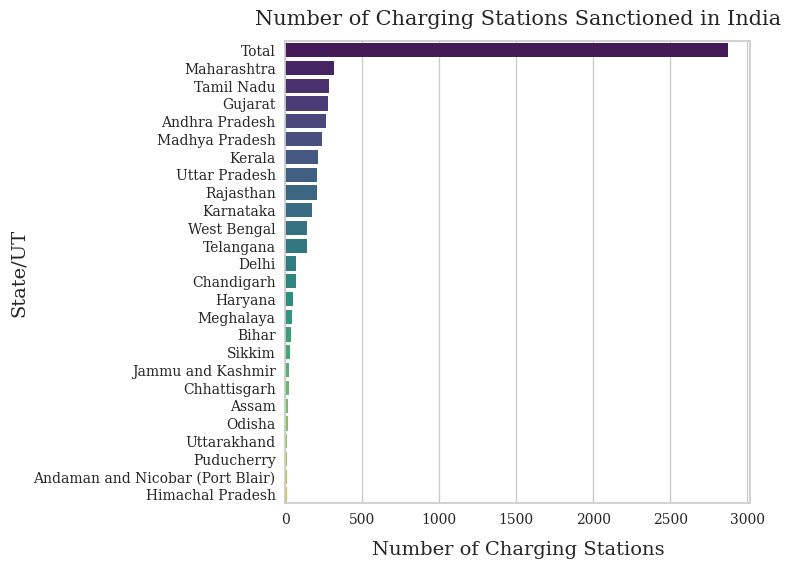

In [ ]:
df1_sorted = df1.sort_values('No. of EV Chargers Sanctioned', ascending=False)
plt.figure(figsize=(6, 6))
sb.barplot(data=df1_sorted, y='State/UT', x='No. of EV Chargers Sanctioned', palette='viridis')
plt.ylabel('State/UT', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
plt.show()

#####**Maharashtra has the maximum number of charging stations sanctioned followed by Tamilnadu and Gujarat.**


In [ ]:
fig = px.bar(df2,x='Brand',y = 'Max. SpeedKm/Hr)',color = 'Brand',title = 'Top Speed in km/h',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)


In [ ]:
fig = px.bar(df2,x='Acceleration(m/s2',y = 'Brand',color = 'Brand',title = 'Fastest Acceleration',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

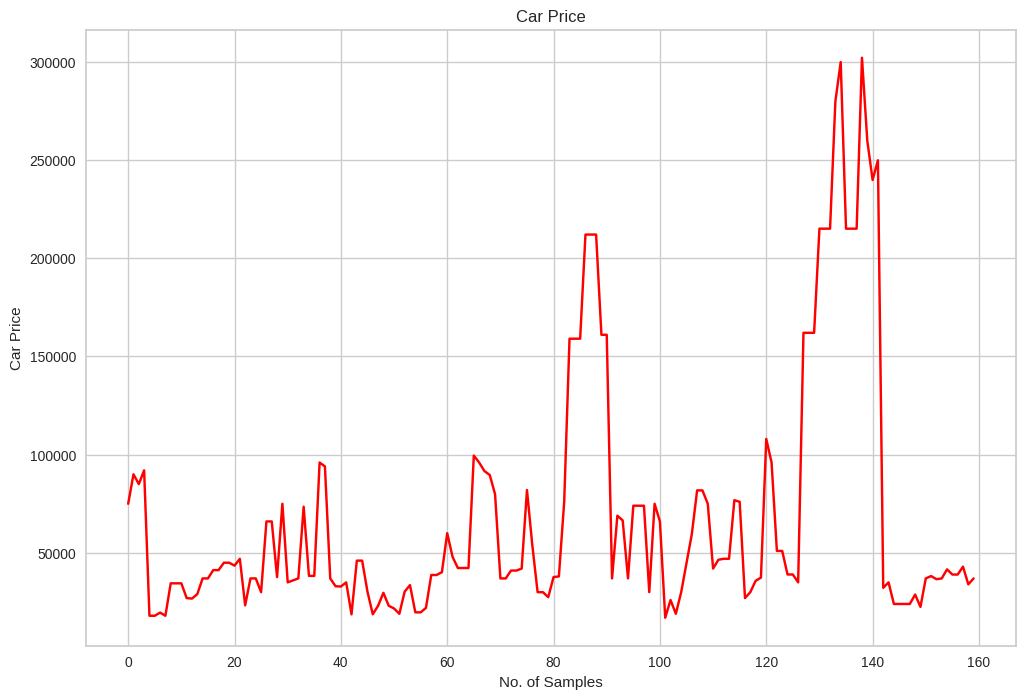

In [ ]:
df2['IncentiveAmountInINR'].plot(figsize = (12,8),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')


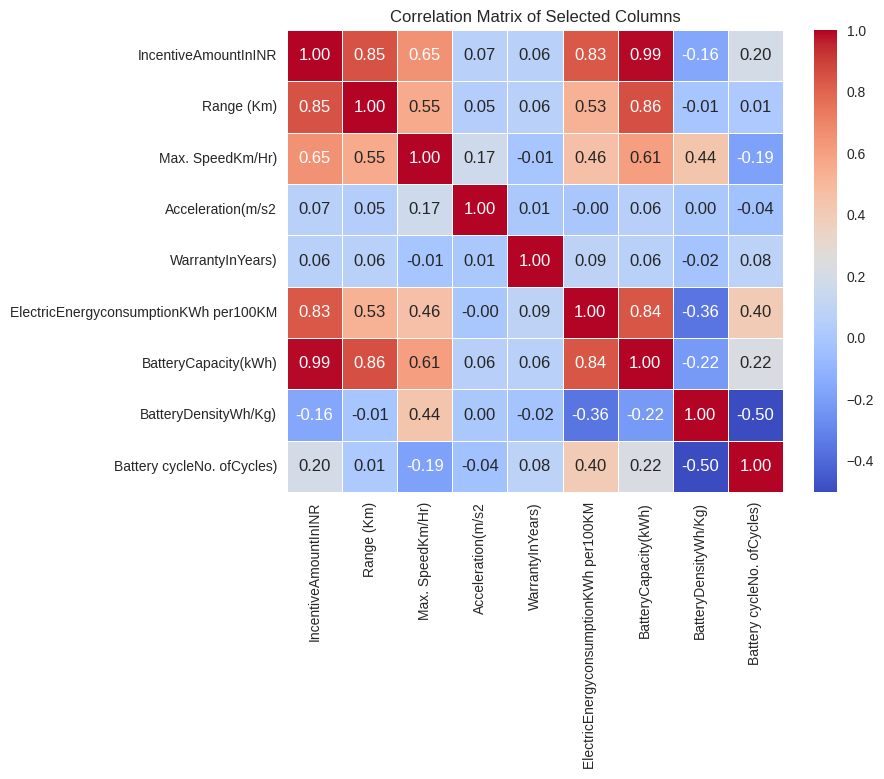

In [ ]:
selected_columns = ["IncentiveAmountInINR", "Range (Km)", "Max. SpeedKm/Hr)" , "Acceleration(m/s2",	"WarrantyInYears)",	"ElectricEnergyconsumptionKWh per100KM", "BatteryCapacity(kWh)","BatteryDensityWh/Kg)","Battery cycleNo. ofCycles)"]
df_selected = df2[selected_columns]

correlation_matrix = df_selected.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Selected Columns")
plt.show()

<ipython-input-45-faf85d061364>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




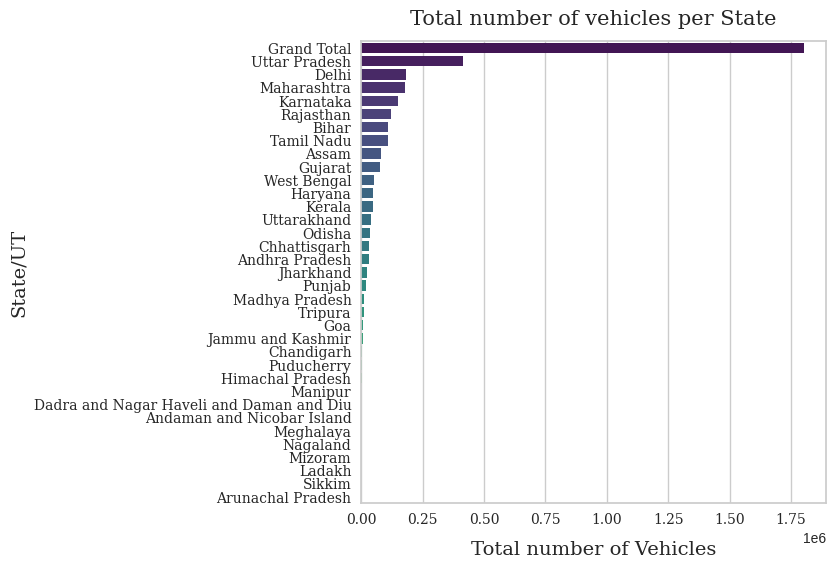

In [ ]:
df3_sorted = df3.sort_values('Grand Total', ascending=False)
plt.figure(figsize=(6, 6))
sb.barplot(data=df3_sorted, y='State Name', x='Grand Total', palette='viridis')
plt.ylabel('State/UT', fontsize=14, family='serif')
plt.xlabel('Total number of Vehicles', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Total number of vehicles per State', weight=200, family='serif', size=15, pad=12)
plt.show()

#### **Maximum Range achieved by a brand**

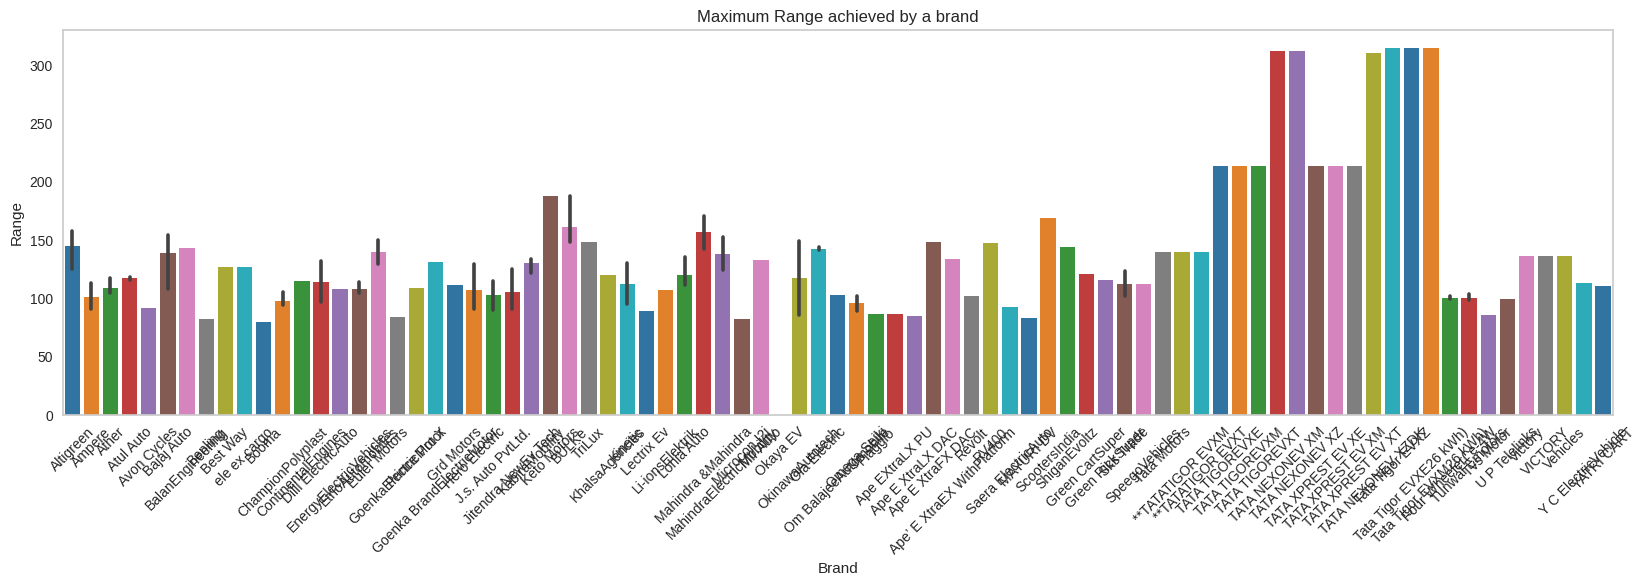

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sb.barplot(x='Brand', y='Range (Km)', hue='Brand', data=df2, palette='tab10', ax=ax)
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

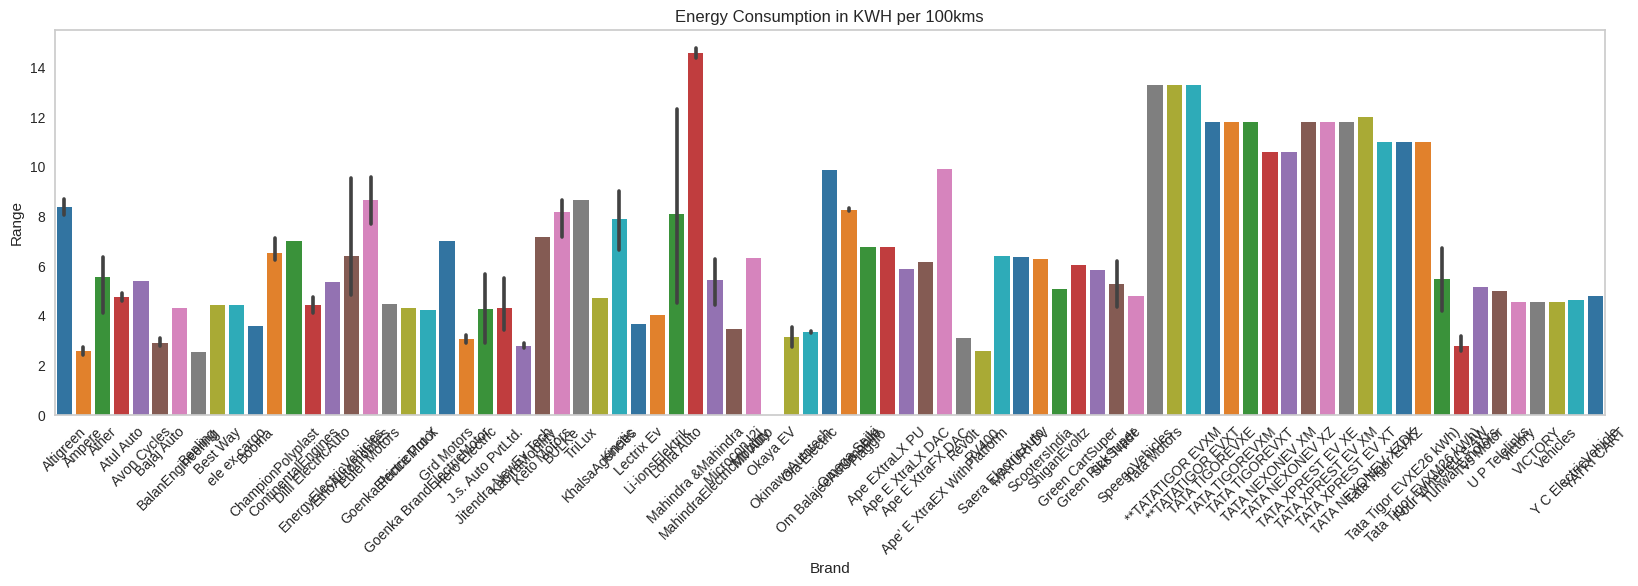

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sb.barplot(x='Brand', y='ElectricEnergyconsumptionKWh per100KM', hue='Brand', data=df2, palette='tab10', ax=ax)
plt.grid(axis='y')
plt.title('Energy Consumption in KWH per 100kms')
plt.xlabel('Brand')
plt.ylabel('Electric energy consumption')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

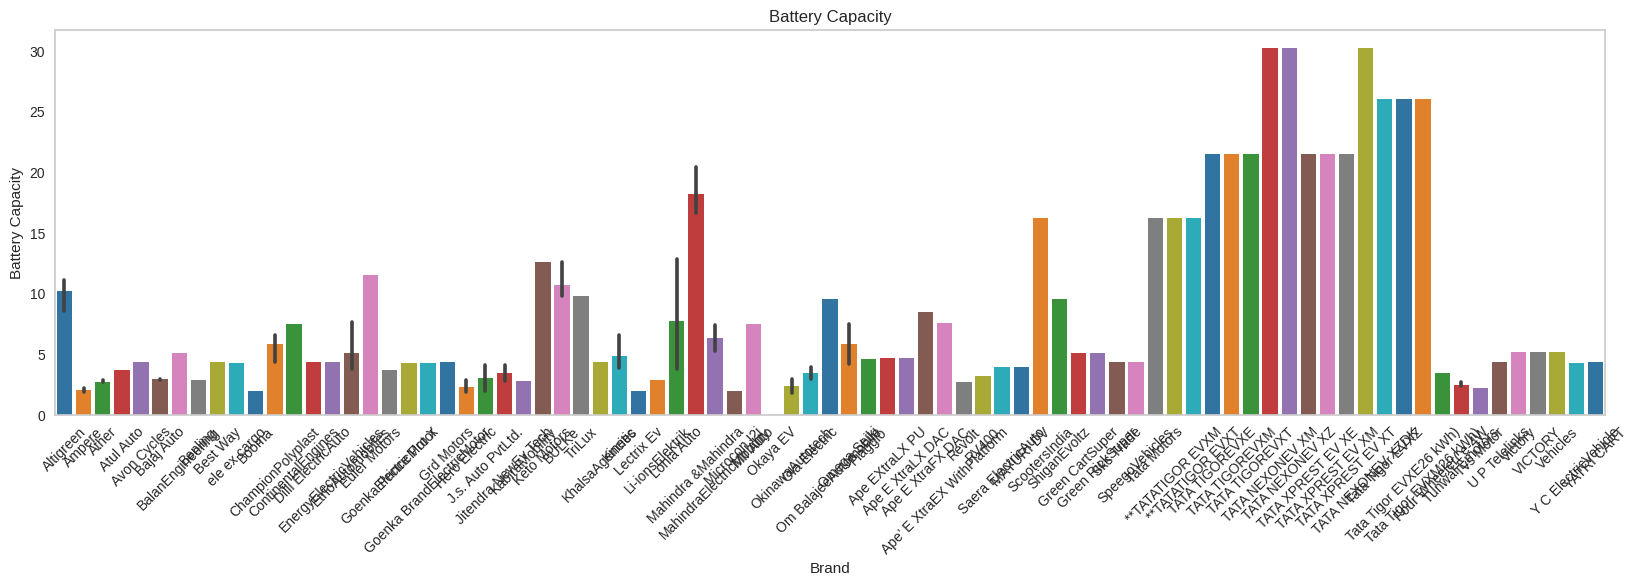

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
sb.barplot(x='Brand', y='BatteryCapacity(kWh)', hue='Brand', data=df2, palette='tab10', ax=ax)
plt.grid(axis='y')
plt.title('Battery Capacity')
plt.xlabel('Brand')
plt.ylabel('Battery Capacity')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

In [ ]:
pca = PCA(n_components=9)
t = pca.fit_transform(df_scaled)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8','PC9'])
data2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.486021,-0.306660,0.003015,0.043200,0.645941,-0.406581,0.204295,-0.134171,0.008010
1,1.279161,-0.443066,0.057678,-0.072371,0.178417,-0.136725,0.233818,-0.274554,0.170793
2,1.240284,-0.444670,0.060755,-0.072183,0.183836,-0.137414,0.238908,-0.317502,0.223132
3,1.279168,-0.370073,0.041148,-0.050762,0.073030,0.086762,0.344584,-0.268892,0.134555
4,-1.607089,0.980899,0.044564,0.208277,-0.406088,-0.099600,0.515110,-0.004774,0.021014
...,...,...,...,...,...,...,...,...,...
155,-0.885761,-1.115223,-0.200433,0.224830,-0.483586,0.755617,-0.281577,-0.064319,0.060796
156,-0.885761,-1.115223,-0.200433,0.224830,-0.483586,0.755617,-0.281577,-0.064319,0.060796
157,-0.854660,-1.113940,-0.202895,0.224679,-0.487922,0.756168,-0.285648,-0.029960,0.018925
158,-1.129486,-1.609444,-0.142905,0.084850,-0.588577,0.272600,0.070909,0.025239,0.022659


In [ ]:
df_9=data2.iloc[:,:9]
df_9.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.486021,-0.306660,0.003015,0.043200,0.645941,-0.406581,0.204295,-0.134171,0.008010
1,1.279161,-0.443066,0.057678,-0.072371,0.178417,-0.136725,0.233818,-0.274554,0.170793
2,1.240284,-0.444670,0.060755,-0.072183,0.183836,-0.137414,0.238908,-0.317502,0.223132


In [ ]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC" + str(i) for i in list(range(1, num_pc + 1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings.T)))
loadings_df['variable'] = df_9.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
PC1,0.495210,0.425483,0.336087,0.044725,0.046148,0.433653,0.495000,-0.090006,0.124365
PC2,0.020429,0.144745,0.447801,0.119802,-0.083876,-0.202112,-0.018613,0.631495,-0.562794
PC3,-0.039196,-0.055535,0.022850,0.784731,0.609433,-0.039909,-0.041635,-0.034019,0.056232
PC4,-0.002398,0.056998,-0.017397,-0.593177,0.782874,-0.001781,-0.009076,0.170676,-0.049765
PC5,-0.069027,-0.370417,0.382828,-0.028607,-0.046478,0.190816,-0.115209,0.465303,0.665057
PC6,0.008771,0.610156,-0.241574,0.039794,-0.047008,-0.536874,0.033045,0.255681,0.459110
PC7,-0.064825,0.004177,0.675061,-0.115873,0.044590,-0.485158,-0.084681,-0.522527,0.095258
PC8,0.547078,-0.527409,-0.156299,-0.012273,0.012843,-0.456284,0.427233,0.084119,-0.000556
PC9,-0.666685,-0.063274,0.025371,-0.002429,0.003460,-0.035796,0.740776,0.028904,-0.000531


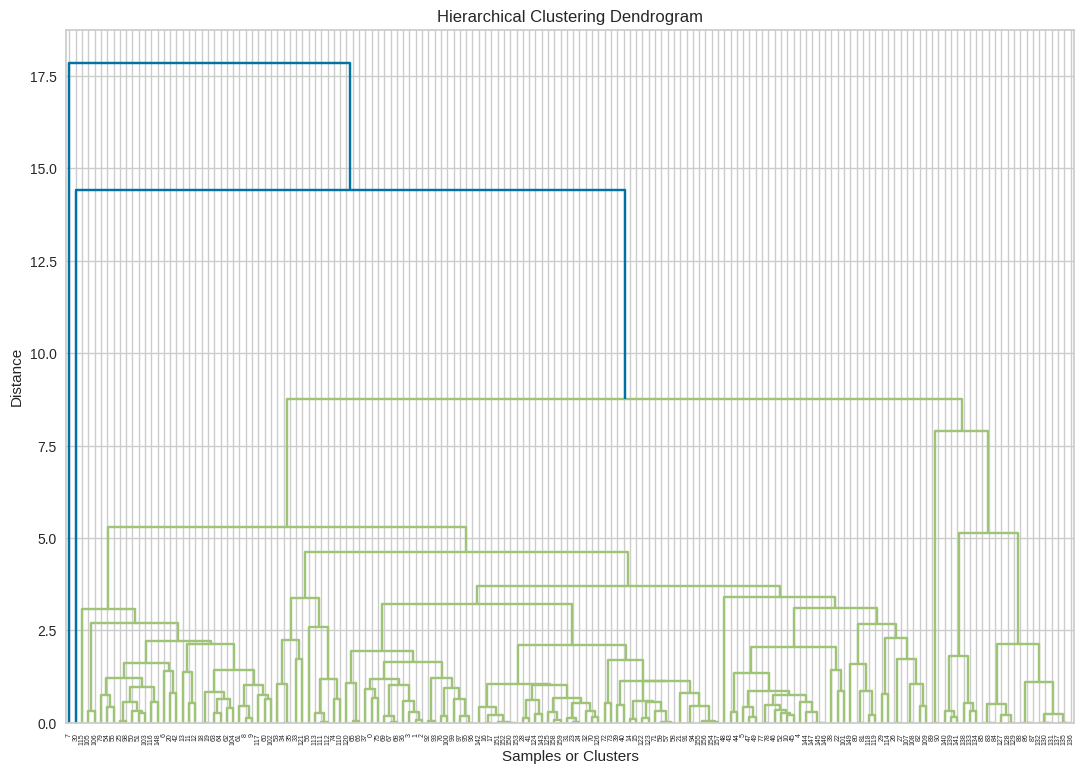

In [ ]:
linked = linkage(data2, method='complete')


plt.figure(figsize=(13, 9))
dendrogram(
    linked,
    orientation='top',
    distance_sort='ascending',
    show_leaf_counts=True
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples or Clusters')
plt.ylabel('Distance')
plt.show()

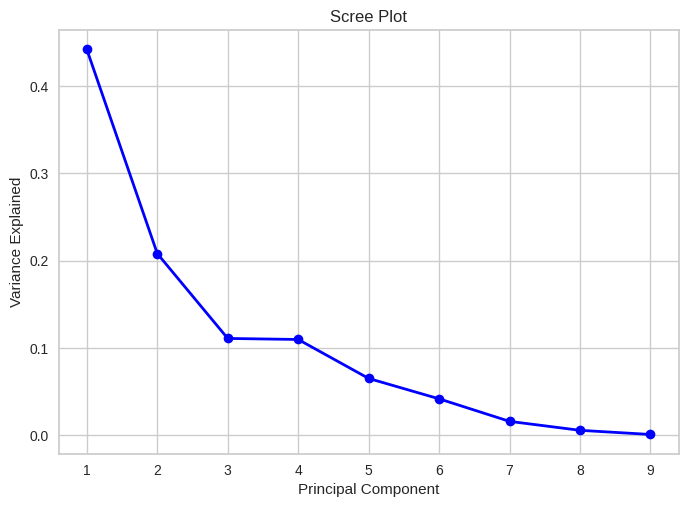

In [ ]:

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

<ipython-input-71-d670b40aa67c>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



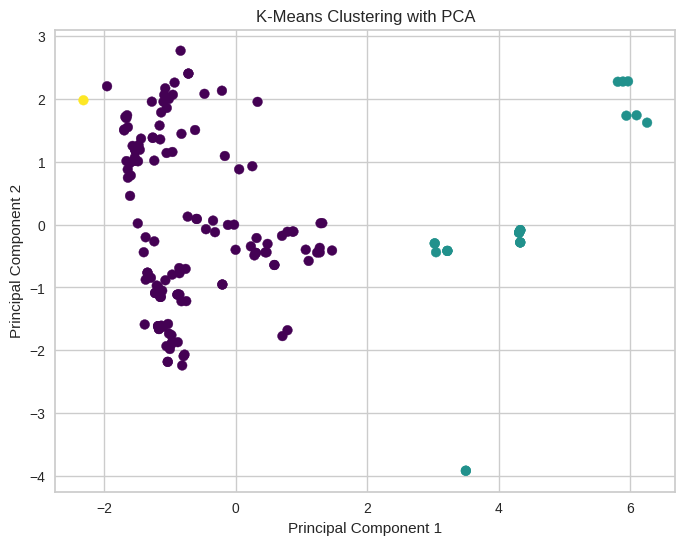

Silhouette Score: 0.5392839969747888


In [ ]:
# Select relevant numerical features for clustering and PCA
features_for_clustering = ['IncentiveAmountInINR', 'Range (Km)', 'Max. SpeedKm/Hr)', 'Acceleration(m/s2', 'WarrantyInYears)', 'ElectricEnergyconsumptionKWh per100KM', 'BatteryCapacity(kWh)', 'BatteryDensityWh/Kg)', 'Battery cycleNo. ofCycles)']
df_cluster = df2[features_for_clustering]

# Handle missing values (replace with the mean for simplicity)
df_cluster.fillna(df_cluster.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
df_pca = pca.fit_transform(df_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42) # You can change the number of clusters
df2['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df2['cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Evaluate the clustering (example: Silhouette score)
silhouette_avg = metrics.silhouette_score(df_scaled, df2['cluster'])
print(f"Silhouette Score: {silhouette_avg}")